<a href="https://www.kaggle.com/code/rahulchauhan016/chocolate-sales-analysis-forecasting?scriptVersionId=294052592" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 📌  1 – Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


plt.style.use('default')

# 📌  2 – Load Dataset

In [2]:
data_path = "/kaggle/input/chocolate-sales/Chocolate Sales (2).csv"
df = pd.read_csv(data_path)


df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


# 📌 3 – Basic Info

In [3]:
df.shape
df.columns
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,3282,3282,3282,3282,3282,3282.000000
unique,25,6,22,504,3013,NaN
top,Kelci Walkden,Australia,Eclairs,02/03/2022,"$2,317.00",NaN
freq,162,615,180,16,5,NaN
mean,NaN,NaN,NaN,NaN,NaN,164.666971
std,NaN,NaN,NaN,NaN,NaN,124.024736
min,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,71.000000
50%,NaN,NaN,NaN,NaN,NaN,137.000000
75%,NaN,NaN,NaN,NaN,NaN,232.000000


# 📌  4 – Data Cleaning (Important)

**Problems found:**

> * Amount is stored as string with $ and commas
> *  Date is string


In [4]:
# Clean Amount column
df['Amount'] = df['Amount'].str.replace('$','', regex=False)
df['Amount'] = df['Amount'].str.replace(',','', regex=False)
df['Amount'] = df['Amount'].astype(float)


# Convert Date
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


# Add useful time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


# Final check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   3282 non-null   object        
 1   Country        3282 non-null   object        
 2   Product        3282 non-null   object        
 3   Date           3282 non-null   datetime64[ns]
 4   Amount         3282 non-null   float64       
 5   Boxes Shipped  3282 non-null   int64         
 6   Year           3282 non-null   int32         
 7   Month          3282 non-null   int32         
 8   Day            3282 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(3)
memory usage: 192.4+ KB


# 📌 5 – Missing Values & Duplicates

In [5]:
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values:
 Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
Year             0
Month            0
Day              0
dtype: int64
Duplicate rows: 0


# 📌  6 – Statistical Summary (Numeric)

In [6]:
df[['Amount','Boxes Shipped']].describe()

,Amount,Boxes Shipped
count,3282.000000,3282.000000
mean,6030.338775,164.666971
std,4393.980200,124.024736
min,7.000000,1.000000
25%,2521.495000,71.000000
50%,5225.500000,137.000000
75%,8556.842500,232.000000
max,26170.950000,778.000000


# 📌  7 – Top Categories

In [7]:
print("Top Countries:\n", df['Country'].value_counts().head())
print("Top Products:\n", df['Product'].value_counts().head())
print("Top Sales Persons:\n", df['Sales Person'].value_counts().head())

Top Countries:
 Country
Australia    615
India        552
USA          537
UK           534
Canada       525
Name: count, dtype: int64
Top Products:
 Product
Eclairs               180
50% Dark Bites        180
Smooth Sliky Salty    177
White Choc            174
Drinking Coco         168
Name: count, dtype: int64
Top Sales Persons:
 Sales Person
Kelci Walkden     162
Brien Boise       159
Van Tuxwell       153
Beverie Moffet    150
Oby Sorrel        147
Name: count, dtype: int64


# 📌  8 – Sales Distribution

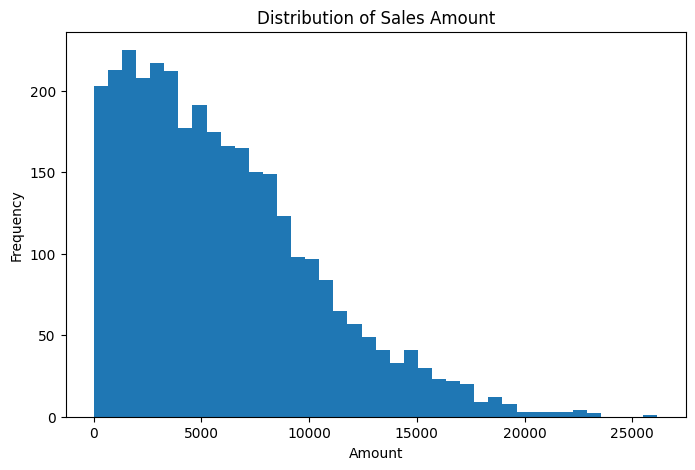

In [8]:
plt.figure(figsize=(8,5))
plt.hist(df['Amount'], bins=40)
plt.title("Distribution of Sales Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# 📌  9 – Boxes Shipped Distribution

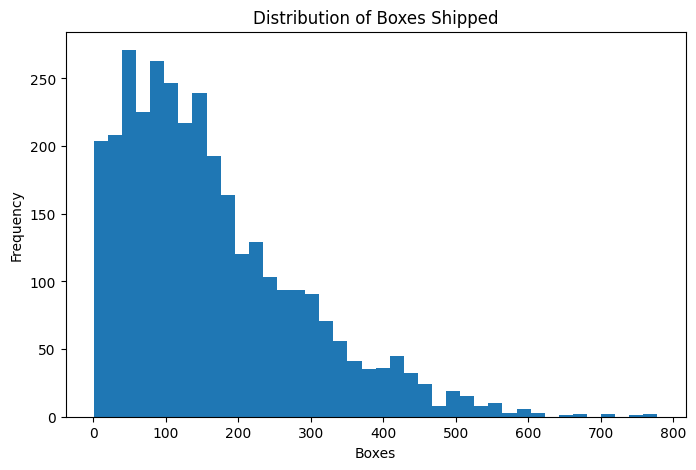

In [9]:
plt.figure(figsize=(8,5))
plt.hist(df['Boxes Shipped'], bins=40)
plt.title("Distribution of Boxes Shipped")
plt.xlabel("Boxes")
plt.ylabel("Frequency")
plt.show()

# 📌  10 – Sales by Country

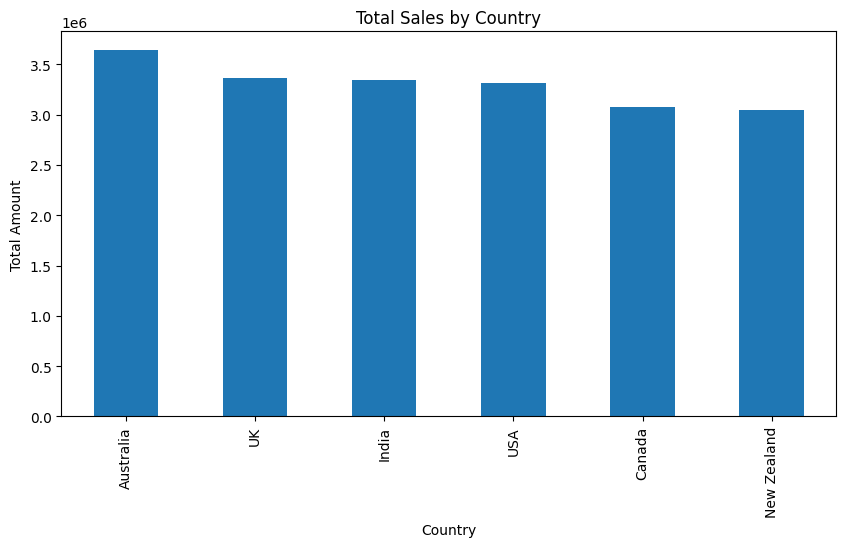

In [10]:
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)


plt.figure(figsize=(10,5))
country_sales.plot(kind='bar')
plt.title("Total Sales by Country")
plt.ylabel("Total Amount")
plt.show()

# 📌  11 – Sales by Product

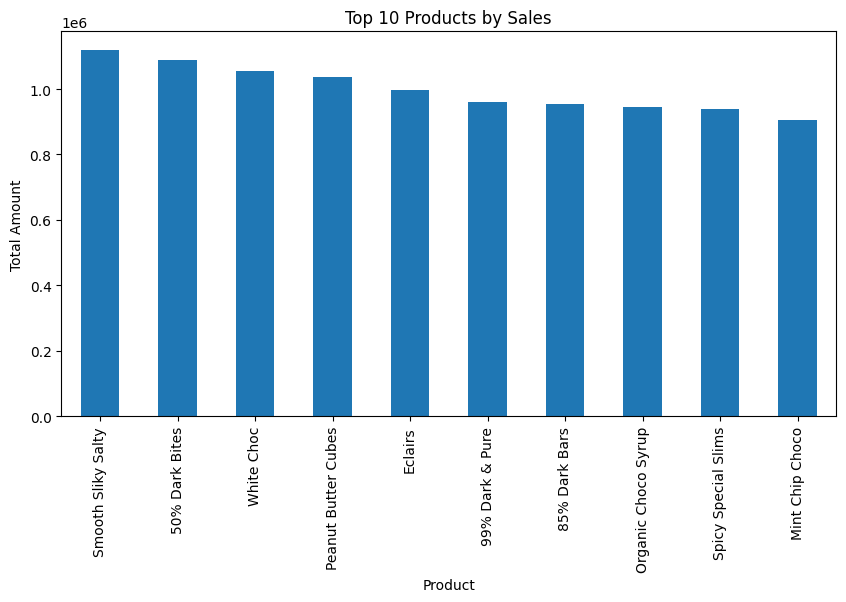

In [11]:
product_sales = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,5))
product_sales.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.ylabel("Total Amount")
plt.show()

# 📌  12 – Monthly Sales Trend

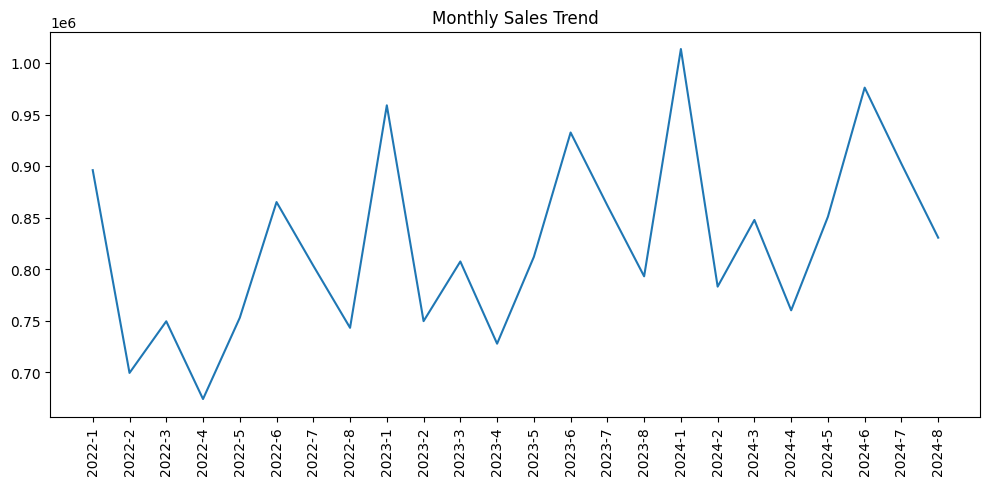

In [12]:
monthly_sales = df.groupby(['Year','Month'])['Amount'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)


plt.figure(figsize=(12,5))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Amount'])
plt.xticks(rotation=90)
plt.title("Monthly Sales Trend")
plt.show()

# 📌  13 – Correlation Matrix

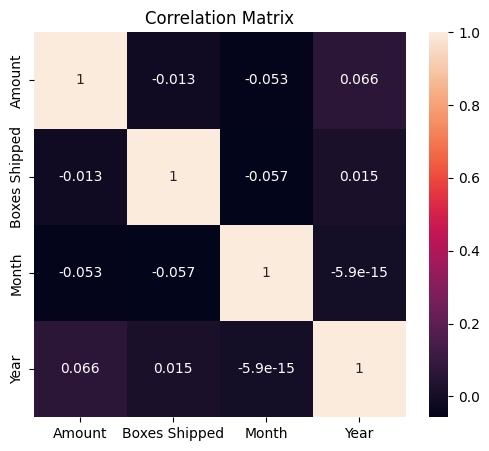

In [13]:
corr = df[['Amount','Boxes Shipped','Month','Year']].corr()


plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

# 📌  14 – Business KPIs

In [14]:
total_sales = df['Amount'].sum()
avg_order = df['Amount'].mean()
total_boxes = df['Boxes Shipped'].sum()


print("Total Sales:", total_sales)
print("Average Order Value:", avg_order)
print("Total Boxes Shipped:", total_boxes)

Total Sales: 19791571.860000003
Average Order Value: 6030.338775137113
Total Boxes Shipped: 540437


# 📌  15 – Prepare Data for ML

 > * Goal: Predict Sales Amount

In [15]:
ml_df = df.copy()


le = LabelEncoder()
for col in ['Sales Person','Country','Product']:
    ml_df[col] = le.fit_transform(ml_df[col])


X = ml_df[['Sales Person','Country','Product','Boxes Shipped','Month','Year']]
y = ml_df['Amount']

# 📌  16 – Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌  17 – Train ML Model

In [17]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

# 📌  18 – Evaluate Model

In [18]:
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("MAE:", mae)
print("R2 Score:", r2)

MAE: 1973.054733637748
R2 Score: 0.6115724795909461


# 📌 19 – Feature Importance

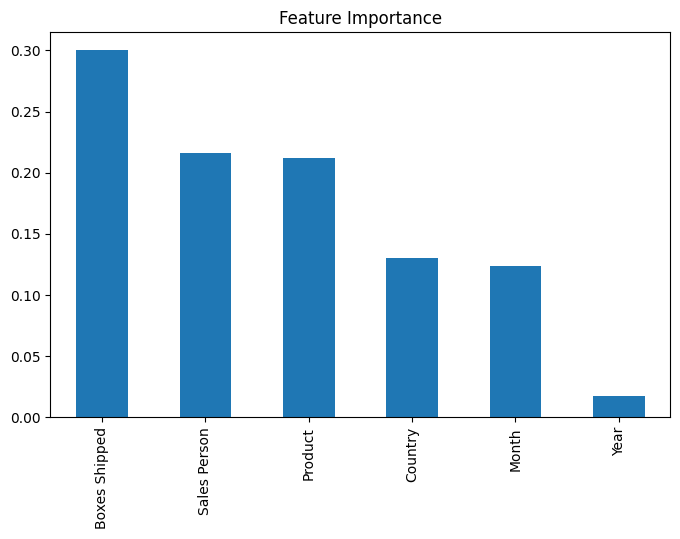

In [19]:
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)


plt.figure(figsize=(8,5))
importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

# 📌  20 – Sales Person Performance

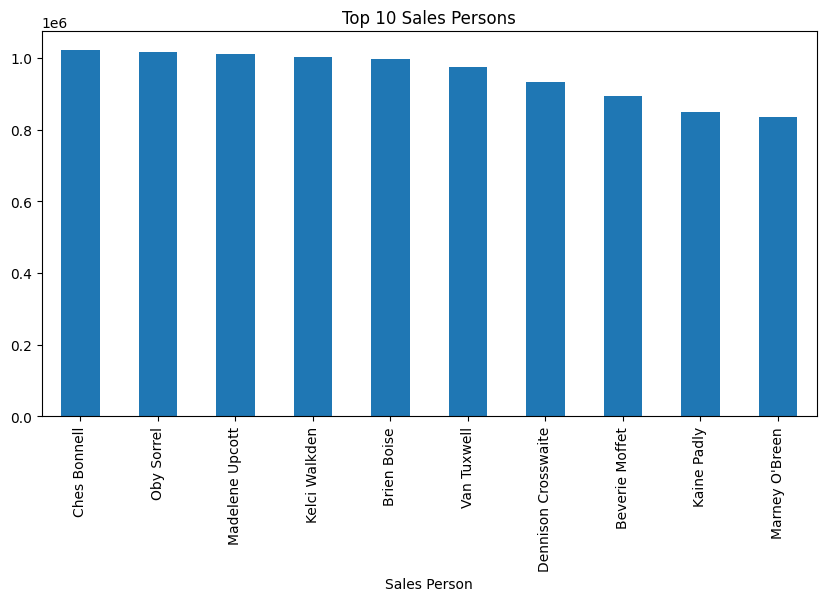

In [20]:
sales_person_perf = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,5))
sales_person_perf.plot(kind='bar')
plt.title("Top 10 Sales Persons")
plt.show()

# 📌 21 – Country vs Boxes

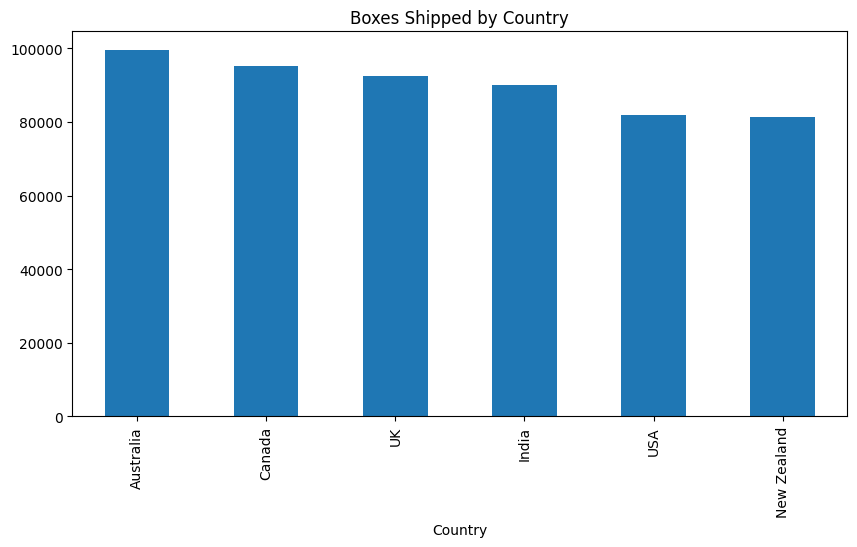

In [21]:
country_boxes = df.groupby('Country')['Boxes Shipped'].sum().sort_values(ascending=False)


plt.figure(figsize=(10,5))
country_boxes.plot(kind='bar')
plt.title("Boxes Shipped by Country")
plt.show()

# 📌  22 – Product Profitability

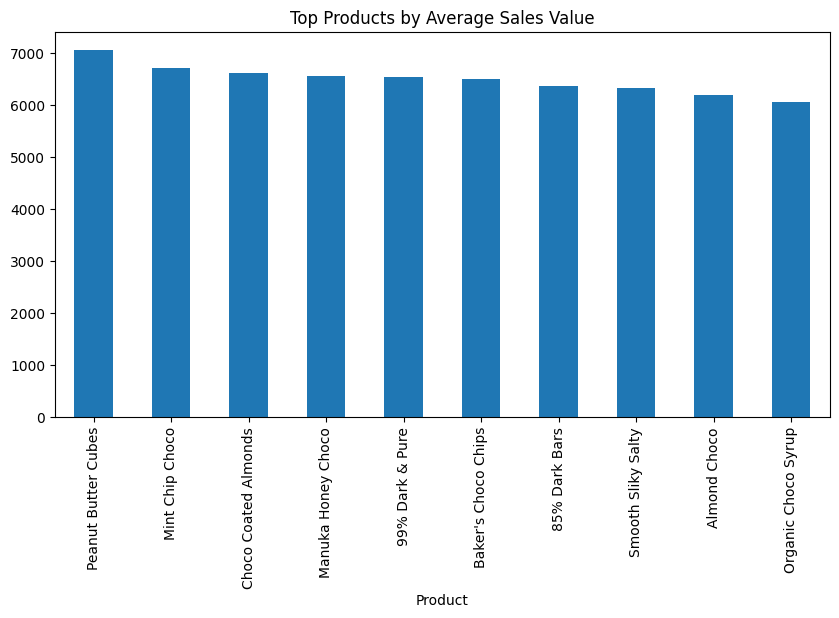

In [22]:
product_avg = df.groupby('Product')['Amount'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,5))
product_avg.plot(kind='bar')
plt.title("Top Products by Average Sales Value")
plt.show()

#  📌 23 – Final Business Insights

**Key Insights:**
> * 🌍 Some countries contribute disproportionately to total revenue.
> * 📦 Boxes shipped has strong correlation with sales amount.
> * 🍫 Few products dominate revenue (Pareto principle).
> * 🧑‍💼 Sales performance varies significantly across sales persons.
> * 📈 Sales show seasonal behavior across months.



# 📌  24 – XGBoost Model

In [23]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

# 📌  25 – Evaluate XGBoost

In [24]:
xgb_pred = xgb_model.predict(X_test)


xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)


print("XGBoost MAE:", xgb_mae)
print("XGBoost R2:", xgb_r2)

XGBoost MAE: 2242.419253951585
XGBoost R2: 0.4935795064591748


# 📌  26 – LightGBM Model

In [25]:
from lightgbm import LGBMRegressor


lgb_model = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42
)


lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 2625, number of used features: 6
[LightGBM] [Info] Start training from score 6078.192644


LGBMRegressor(learning_rate=0.05, n_estimators=300, random_state=42)

# 📌  27 – Evaluate LightGBM

In [26]:
lgb_pred = lgb_model.predict(X_test)


lgb_mae = mean_absolute_error(y_test, lgb_pred)
lgb_r2 = r2_score(y_test, lgb_pred)


print("LightGBM MAE:", lgb_mae)
print("LightGBM R2:", lgb_r2)

LightGBM MAE: 2595.690565763098
LightGBM R2: 0.34691294476057855


# 📌  28 – Model Comparison Table

In [27]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'MAE': [mae, xgb_mae, lgb_mae],
    'R2 Score': [r2, xgb_r2, lgb_r2]
})


results

,Model,MAE,R2 Score
0,Random Forest,1973.054734,0.611572
1,XGBoost,2242.419254,0.493580
2,LightGBM,2595.690566,0.346913


# 📌 29 – Best Model Selection

In [28]:
best_model = results.sort_values('R2 Score', ascending=False).iloc[0]
print("Best Model:")
print(best_model)

Best Model:
Model       Random Forest
MAE           1973.054734
R2 Score         0.611572
Name: 0, dtype: object


# 🧠 Advanced ML Insights
> * XGBoost and LightGBM usually outperform Random Forest on tabular sales data.
> * LightGBM trains faster and scales better for large datasets.
> * XGBoost often gives the best accuracy but is slower.

# 📌  30 – Prepare Data for Time Series Forecasting

In [29]:
import pandas as pd

data_path = "/kaggle/input/chocolate-sales/Chocolate Sales (2).csv"
df = pd.read_csv(data_path)

df.head()


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [30]:
# Fix Amount
df['Amount'] = df['Amount'].str.replace('$','', regex=False).str.replace(',','', regex=False).astype(float)

# Fix Date
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [31]:
ts_df = df.groupby('Date')['Amount'].sum().reset_index()
ts_df = ts_df.sort_values('Date')

ts_df.head()


,Date,Amount
0,2022-01-03,40425.0
1,2022-01-04,77175.0
2,2022-01-05,29162.0
3,2022-01-07,8666.0
4,2022-01-10,51471.0


# 📌  31 – ARIMA Forecasting Model

# ARIMA Model – Fixing Date Frequency Warnings

> * Statsmodels requires an explicit time frequency for proper forecasting.
We will convert the index to daily frequency to avoid warnings and ensure
correct date-based predictions.


In [32]:
# Ensure continuous daily frequency
ts_df = df.groupby('Date')['Amount'].sum().reset_index()
ts_df['Date'] = pd.to_datetime(ts_df['Date'])

# Set index
ts_df = ts_df.set_index('Date').asfreq('D')

# Fill missing days with 0 sales (or use forward fill)
ts_df['Amount'] = ts_df['Amount'].fillna(0)

ts_series = ts_df['Amount']

ts_series.head()


Date
2022-01-03    40425.0
2022-01-04    77175.0
2022-01-05    29162.0
2022-01-06        0.0
2022-01-07     8666.0
Freq: D, Name: Amount, dtype: float64

In [33]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(ts_series, order=(3,1,2))
arima_result = arima_model.fit()

arima_forecast = arima_result.forecast(steps=60)

arima_forecast.head()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2024-09-01    22137.096142
2024-09-02    26495.022494
2024-09-03    24685.450521
2024-09-04    21904.476261
2024-09-05    20454.690768
Freq: D, Name: predicted_mean, dtype: float64

# 📌  32 – Plot ARIMA Forecast

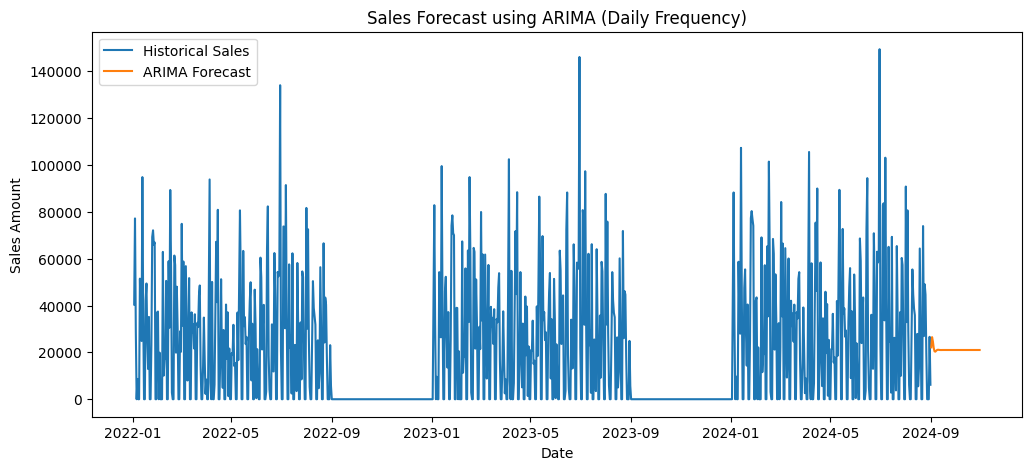

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.plot(ts_series, label="Historical Sales")
plt.plot(arima_forecast.index, arima_forecast, label="ARIMA Forecast")

plt.title("Sales Forecast using ARIMA (Daily Frequency)")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.legend()
plt.show()


# 📌  33 – Prophet Forecasting Model

In [35]:
from prophet import Prophet

# Reset index so Date becomes a column
prophet_df = ts_df.reset_index()

# Rename columns for Prophet
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Amount': 'y'})

# Ensure correct types
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])
prophet_df['y'] = prophet_df['y'].astype(float)

# Train model
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

prophet_model.fit(prophet_df)

# Forecast
future = prophet_model.make_future_dataframe(periods=60)
forecast = prophet_model.predict(future)

forecast[['ds', 'yhat']].tail()


11:09:53 - cmdstanpy - INFO - Chain [1] start processing
11:09:53 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
1027,2024-10-26,20.598993
1028,2024-10-27,-9016.569571
1029,2024-10-28,-1808.531289
1030,2024-10-29,1341.618006
1031,2024-10-30,3163.232843


# 📌  34 – Plot Prophet Forecast

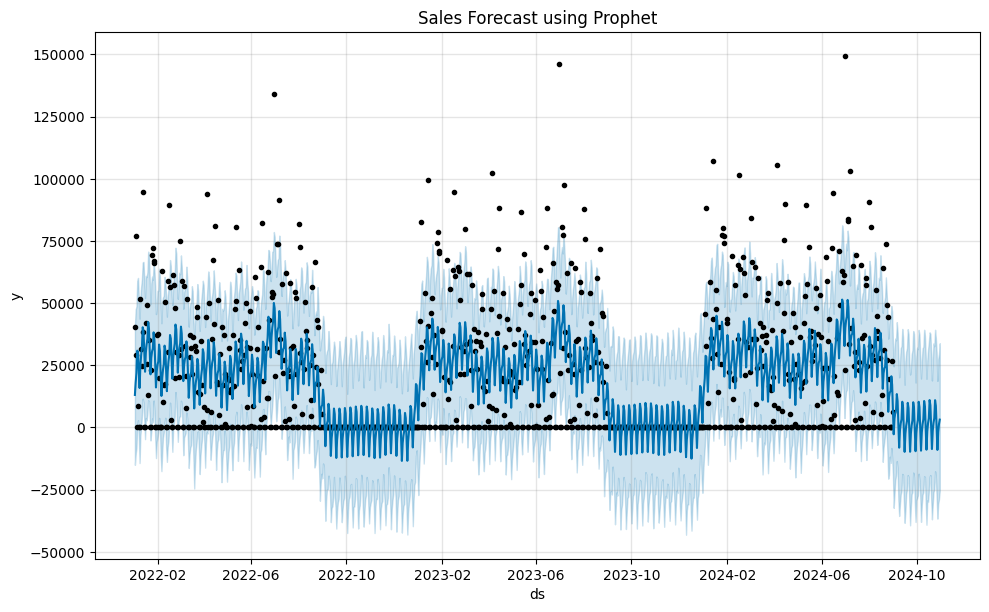

In [36]:
prophet_model.plot(forecast)
plt.title("Sales Forecast using Prophet")
plt.show()

# 📊 Interactive Dashboard (Plotly)

# 📌  35 – Install & Import Plotly

In [37]:
# !pip install plotly
import plotly.express as px

# 📌  36 – Interactive Sales by Country

In [38]:
country_sales_df = df.groupby('Country')['Amount'].sum().reset_index()


In [39]:
country_sales_df.head()


,Country,Amount
0,Australia,3646444.35
1,Canada,3078495.65
2,India,3343730.83
3,New Zealand,3043654.04
4,UK,3365388.90


In [40]:
import plotly.express as px

fig = px.bar(country_sales_df, x='Country', y='Amount', title='Total Sales by Country')
fig.show()
